### Import Libraries

In [399]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score ,classification_report,confusion_matrix,ConfusionMatrixDisplay


### Data Loading

In [400]:
df=pd.read_csv('titanic_train.csv')

In [401]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [402]:
df.shape

(891, 12)

In [403]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [404]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

#### Missing Data

In [405]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

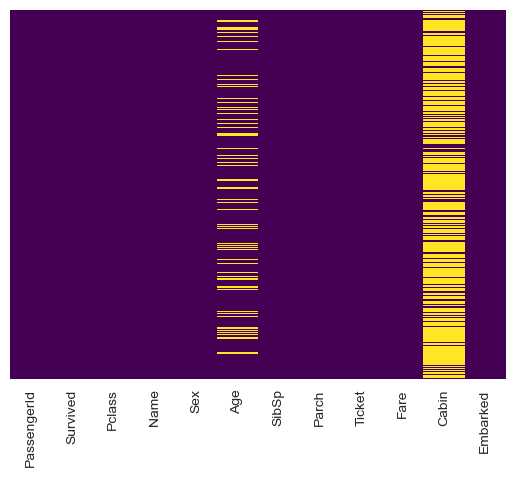

In [406]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Data Visualization

<Axes: xlabel='Survived', ylabel='count'>

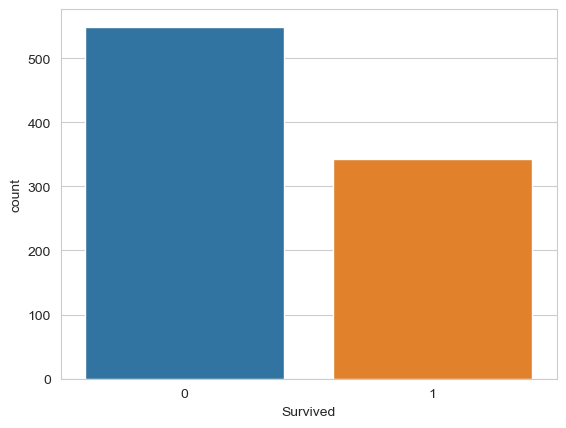

In [407]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)

<Axes: xlabel='Survived', ylabel='count'>

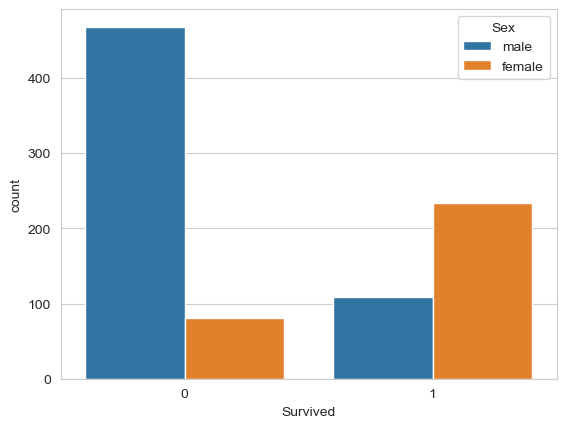

In [408]:
sns.countplot(x='Survived',hue='Sex',data=df)

<Axes: xlabel='Survived', ylabel='count'>

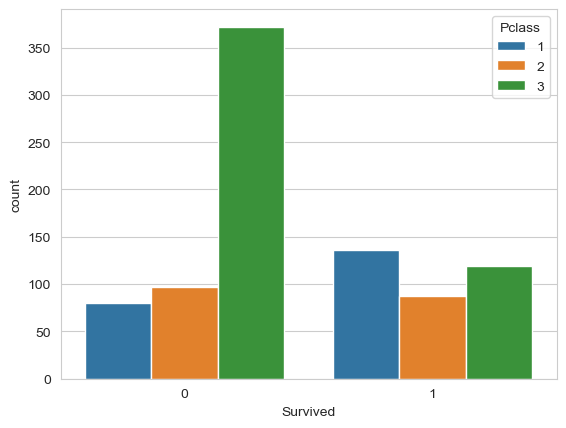

In [409]:
sns.countplot(x='Survived',hue='Pclass',data=df)

c:\Users\garla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


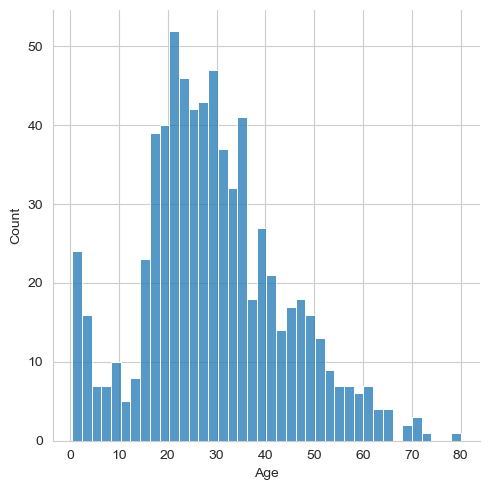

In [410]:
sns.displot(df['Age'].dropna(),kde=False,bins=40)

<Axes: xlabel='SibSp', ylabel='count'>

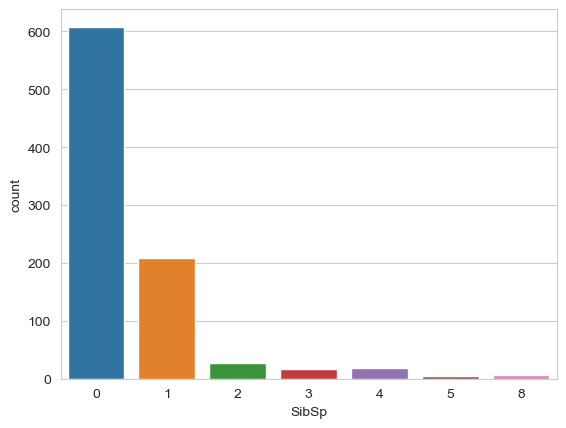

In [411]:
sns.countplot(x='SibSp',data=df)

<Axes: >

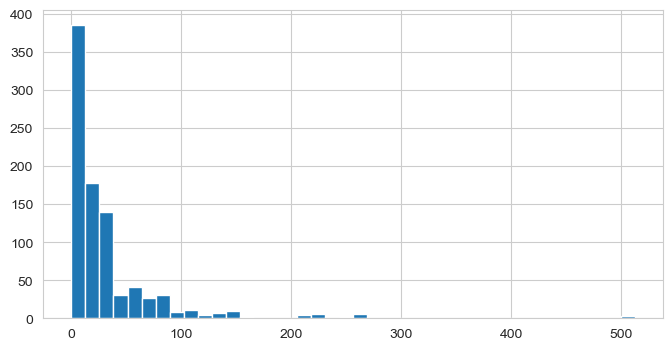

In [412]:
df['Fare'].hist(bins=40,figsize=(8,4))

### Data Cleaning

<IPython.core.display.Javascript object>

<Axes: xlabel='Pclass', ylabel='Age'>

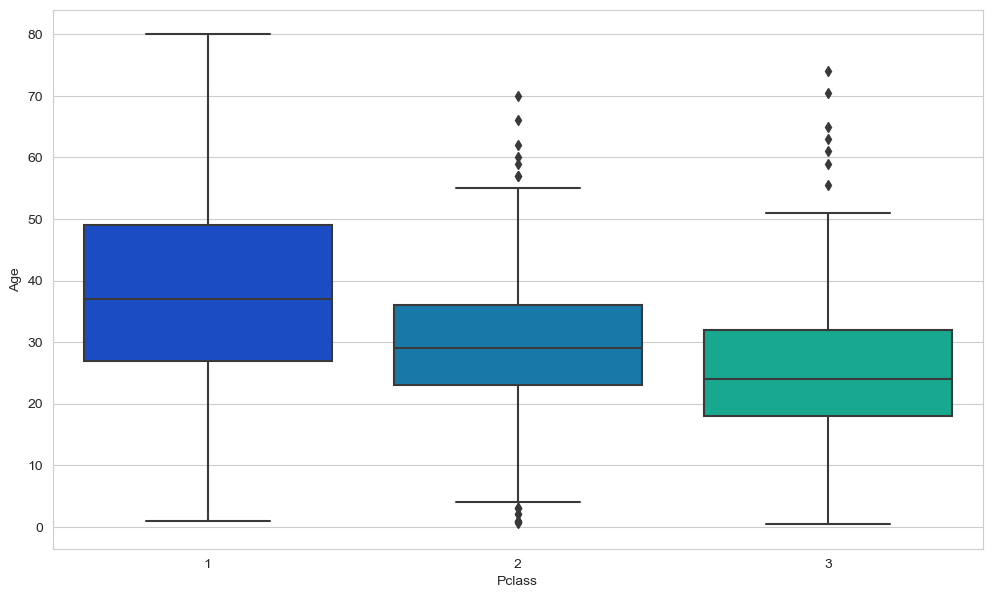

In [413]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

#### Replacing missing Age values using the impute_age() function which estimates age based on Pclass


In [414]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [415]:
df['Age']=df[['Age','Pclass']].apply(impute_age,axis=1)

C:\Users\garla\AppData\Local\Temp\ipykernel_11544\3983263054.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\garla\AppData\Local\Temp\ipykernel_11544\3983263054.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

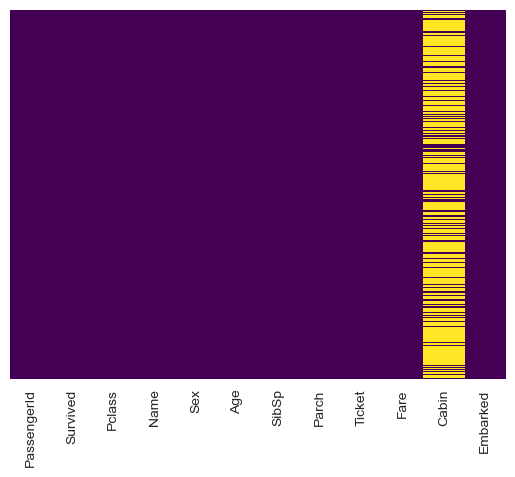

In [416]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [417]:
df.drop('Cabin',axis=1,inplace=True)

In [418]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [419]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [420]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [421]:
sex=pd.get_dummies(df['Sex'],drop_first=True)
embark=pd.get_dummies(df['Embarked'],drop_first=True)

In [423]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [424]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [425]:
df = pd.concat([df,sex,embark],axis=1)

In [426]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


### Data Scaling

In [427]:
X=df.drop(columns=['Survived'])
y=df['Survived']

### Data Spliting

In [428]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

### Model Traning

#### Logistic Regression

In [429]:
logistic_model=LogisticRegression()

In [430]:
logistic_model.fit(X_train,y_train)

c:\Users\garla\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [431]:
logistic_pred=logistic_model.predict(X_test)
logistic_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0], dtype=int64)

In [432]:
logistic_accuracu=logistic_model.score(X_test,y_test)
print(f"Logistic Regression model accuracy : {logistic_accuracu:.2f}")

Logistic Regression model accuracy : 0.77


In [433]:
logistic_cr=classification_report(y_test,logistic_pred)
print(f"Classification Report :\n {logistic_cr}")

Classification Report :
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       155
           1       0.75      0.69      0.72       113

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [434]:
logistic_cm=confusion_matrix(y_test,logistic_pred)
print(f"Confusion matrix :\n{logistic_cm}")

Confusion matrix :
[[129  26]
 [ 35  78]]


#### KNN

In [435]:
knn_model=KNeighborsClassifier(n_neighbors=4)

In [436]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [437]:
knn_pred=knn_model.predict(X_test)
knn_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0], dtype=int64)

In [438]:
knn_accuracy=accuracy_score(y_test,knn_pred)
print(f"KNN model Accuracy : {knn_accuracy:.2f}")

KNN model Accuracy : 0.62


In [439]:
knn_cr=classification_report(y_test,knn_pred)
print(f"Classification Report :\n {knn_cr}")

Classification Report :
               precision    recall  f1-score   support

           0       0.62      0.87      0.72       155
           1       0.60      0.27      0.37       113

    accuracy                           0.62       268
   macro avg       0.61      0.57      0.55       268
weighted avg       0.61      0.62      0.57       268



In [440]:
knn_cm=confusion_matrix(y_test,knn_pred)
print(f"Confusion metrix :\n {knn_cm}")

Confusion metrix :
 [[135  20]
 [ 83  30]]


#### Decision Tree

In [441]:
dt_model=DecisionTreeClassifier(criterion='entropy',random_state=42)

In [442]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [443]:
dt_pred=dt_model.predict(X_test)
dt_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0], dtype=int64)

In [444]:
dt_accuracy=accuracy_score(y_test,dt_pred)
print(f"Decision Tree Accuracy :{dt_accuracy:.2f}")

Decision Tree Accuracy :0.71


In [445]:
dt_cr=classification_report(y_test,dt_pred)
print(f"Classification Report :\n{dt_cr}")

Classification Report :
              precision    recall  f1-score   support

           0       0.74      0.77      0.75       155
           1       0.67      0.62      0.64       113

    accuracy                           0.71       268
   macro avg       0.70      0.70      0.70       268
weighted avg       0.71      0.71      0.71       268



In [446]:
dt_cm=confusion_matrix(y_test,dt_pred)
print(f"Confusion Matrix :\n{dt_cm}")

Confusion Matrix :
[[120  35]
 [ 43  70]]


### SVM

In [447]:
svm_model=SVC(kernel='linear')

In [448]:
svm_model.fit(X_train,y_train)

SVC(kernel='linear')

In [449]:
svm_pred=svm_model.predict(X_test)
svm_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0], dtype=int64)

In [450]:
svm_accuracy=(accuracy_score(y_test,svm_pred))
print(f"SVM Accuracy : {svm_accuracy:.2f}")

SVM Accuracy : 0.81


In [451]:
svm_cr=classification_report(y_test,svm_pred)
print(f"Classification Report :\n {svm_cr}")

Classification Report :
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       155
           1       0.79      0.74      0.77       113

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



In [452]:
svm_cm=confusion_matrix(y_test,svm_pred)
print(f"Confusion matrix :\n{svm_cm}")

Confusion matrix :
[[133  22]
 [ 29  84]]


#### Gradient Boosting

In [453]:
gb_model=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=3,random_state=42)

In [454]:
gb_model.fit(X_train,y_train)

GradientBoostingClassifier(random_state=42)

In [455]:
gb_pred=gb_model.predict(X_test)
gb_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0], dtype=int64)

In [456]:
gb_accuracy=accuracy_score(y_test,gb_pred)
print(f"Gradient Bosting Accuracy: {gb_accuracy:.2f}")

Gradient Bosting Accuracy: 0.81


In [457]:
gb_cr=classification_report(y_test,gb_pred)
print(f"Classification Report :\n{gb_cr}")

Classification Report :
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       155
           1       0.82      0.70      0.76       113

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268



In [458]:
gb_cm=confusion_matrix(y_test,gb_pred)
print(f"Confusion matrix :\n{gb_cm}")

Confusion matrix :
[[138  17]
 [ 34  79]]


##### Best Model

In [459]:
models=['Logistic Regression','K-Nearest Neighbors','Decision Tree','Support Vector Machine','Gradent Boosting']
accuracies=[logistic_accuracu,knn_accuracy,dt_accuracy,svm_accuracy,gb_accuracy]

results = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies
})
results = results.set_index('Model')
results = results.sort_values(by='Accuracy', ascending=False)
print(results)


                        Accuracy
Model                           
Support Vector Machine  0.809701
Gradent Boosting        0.809701
Logistic Regression     0.772388
Decision Tree           0.708955
K-Nearest Neighbors     0.615672


In [460]:
best_model = results['Accuracy'].idxmax()
best_accuracy = results['Accuracy'].max()

print(f"The model with the highest accuracy is '{best_model}' with an accuracy of {best_accuracy:.2f}")

The model with the highest accuracy is 'Support Vector Machine' with an accuracy of 0.81
